# Introduction



Objectives:
- This investiagtion will mathematically model projectile motion in 3 spatial dimension as function of time in Python
- Use Python to present results whilst assessing reliability and real world use.
- Numerically solve coupled differential equations

Parameters:$$\text{
}$$
Displacment in the 3 spatial dimensions is a function of time. We get this by numerically integrating ordinary differential equations (ODEs) which are of themselves Newton's 2nd Law in action as the second derivative of displacement (acceleration). Some constants appear such as terminal velocity which can be changed. We can use the given parameters to demonstrates how other variables change with time. $$\text{
}$$
Measurement errors:$$\text{
}$$
Measurement errors in using python arise commonly from the rounding of decimals to floats. For firing projectiles, the cannonball will often have an error on the target of about 20cm maximum and 2cm minimum. 


# Method and Results 

## Part 1: Theoretical Analysis of the Role of Drag


1)
$$\int_{0}^{V_z}\frac{{U^2_T}}{{U^2\text{ }-U^2_T}}dU=gt$$
$$-U^2_T\int_{0}^{V_z}\frac{{1}}{{U^2_T\text{ }-U^2}}dU=gt$$
$$-U^2_T[\frac{{1}}{{U_T}}artanh(\frac{{U}}{{U_T}})]=gt$$
$$-U^2_T[\frac{{1}}{{U_T}}artanh(\frac{{U}}{{U_T}})]_{0}^{V_z}=gt$$
$$\frac{{1}}{{U_T}}artanh(\frac{{V_z}}{{U_T}})=\frac{{gt}}{{-U^2_T}}$$
$$artanh\frac{{V_z}}{{U_T}}=-\frac{{gt}}{{U_T}}$$
$$V_z=-U_Ttanh(\frac{{gt}}{{U_T}})$$
2)
To get Height as a function of time the integral of velocity with respect to time must be taken

$$z=\int V_z$$
$$=\int-U_Ttanh(\frac{{gt}}{{U_T}})dt$$
$$=-U_T\int\frac{{(sinh\frac{{gt}}{{U_T}})}}{{(cosh\frac{{gt}}{{U_T}}) }}dt$$
with a substituion of $$w=cosh\frac{{gt}}{{U_T}}$$
The integral is simplified to $$=\frac{{-U_T^2}}{{g}}\int\frac{{dw}}{{w}}$$
$$z=\frac{{-U_T^2}}{{g}}ln(cosh\frac{{gt}}{{U_T}})+C$$
C is a constant, so is the initial height. $$z=z_0-\frac{{U_T^2}}{{g}}ln(cosh\frac{{gt}}{{U_T}})$$

$$\int_{1}^{2}dt$$
$$\frac{{500x}}{{(6)}}$$

## Part 2 Numerical Study of the Role of Drag

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt #imports from various libraries
plt.rcParams['figure.dpi'] = 150 


Question 3)


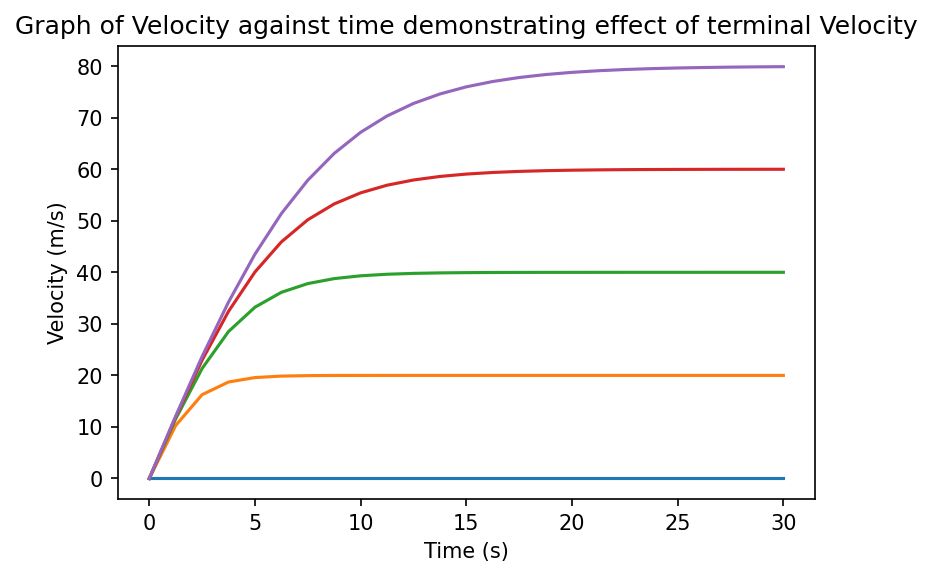

In [3]:
print('\033[1m' + 'Question 3)' + '\033[0m')
def var_initial(t, u_t, g):
    v= -(u_t)*np.tanh((g*t)/((u_t)^2)) # creates a computer fucntion returning velocity with an input of time
    return v
t=np.linspace(0,30,25) # sets time between 0 and 30 with 25 elements
g=-10 #value og gravitaional constant
for u_t in range(0,100,20):
    var_initial(t,u_t,g)  #uses the function to calculate values for velocity with varying values of U_T (terminal velocity)
    plt.title("Graph of Velocity against time demonstrating effect of terminal Velocity")
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.plot(t,var_initial(t,u_t,g)) #plots graph of velocity against time

$$Figure 1$$
Figure 1 shows how objects approach a maximum (terminal) value of velocity under freefall
U_T has units of metres per second so is much easier to think about as the physical quantity terminal velocity, the maximum velocity an object can reach in an atmosphere with drag. It is easy to visualise in scenerios such as skydiving where as the coefficeint **b** is not an intuitive concept.

In [6]:
print('\033[1m' + 'Question 4)' + '\033[0m')
u_t=100   
h_0=100
g=10
t=0   #defines starting parameters for new function
def height(u_t,h_0,g,t):
    h=h_0-((u_t)**2/g)*np.log(np.cosh((g*t)/(u_t))) # creates a computer fucntion returning height with an input of time
    return h
h=height(u_t,h_0,g,t)
while h>0:   #loop is whilst the cannonball is above the ground until it hits it
    t=t+0.01  #loop calculates height with small steps
    h=height(u_t,h_0,g,t)
print("with drag, takes " + str(round(t,5)) + " seconds for the cannonball to hit the ground")
t=0
while h<100:  #same as above but different set up of loop to account for lack of drag
    t=t+0.01
    h=(g*t**2)/2 #no air resistance just freefall under gravittaional accerleration 
print("without drag, takes " + str(round(t,5)) + " seconds for the cannonball to hit the ground")


Question 4)
with drag, takes 4.55 seconds for the cannonball to hit the ground
without drag, takes 4.48 seconds for the cannonball to hit the ground


# Part 2

In [7]:
def vectorfield(w,t):
    x,v_x,z,v_z,y,v_y=w #defines vectorfield and what will be integrated
    f=[v_x,(-g/(u_t)**2)*(v_x)*(((v_x)**2)+((v_z)**2)+((v_y)**2))**0.5,v_z,(-g/(u_t)**2)*(v_z)*(((v_x)**2)+((v_z)**2)+((v_y)**2))**0.5-g,0,0]
    return f

In [8]:
g=10
z_0=0
x_0=0
v_x=500
v_z=500
v_y=0
y_0=0
u_t=100
w_0=[x_0,v_x,z_0,v_z,y_0,v_y] #defines initial conditions and groups them in an array

In [9]:
import numpy as np
from scipy.integrate import odeint
t = np.arange(0, 35, 0.01) # sets up input of time
wsol = odeint(vectorfield, w_0, t) #integrates the vectorfield as a function of time 

Question 1)


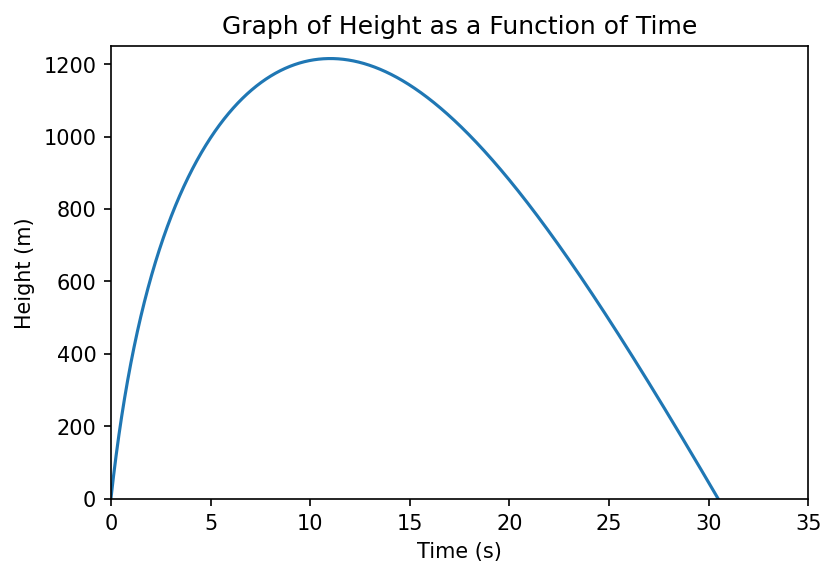

This graph demonstrates how the height changes as a function time 


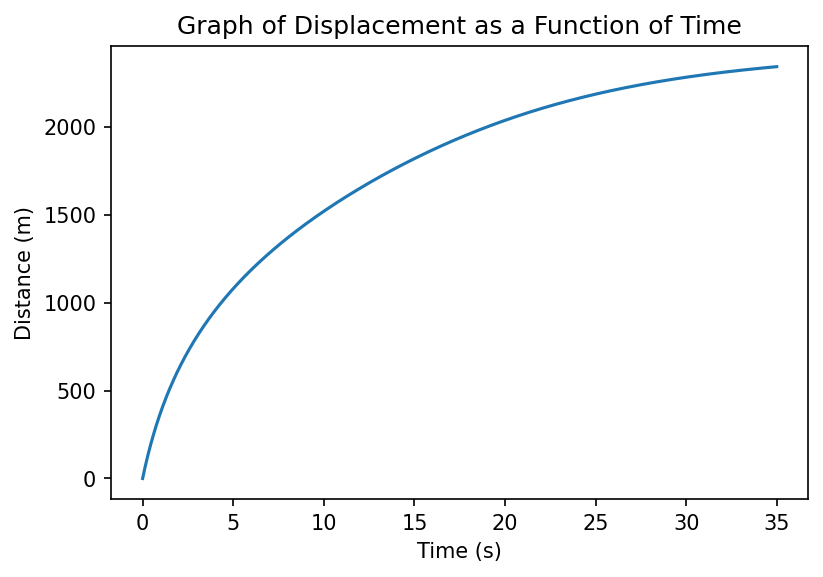

This graph demonstrates how the displacement increases as a function time.


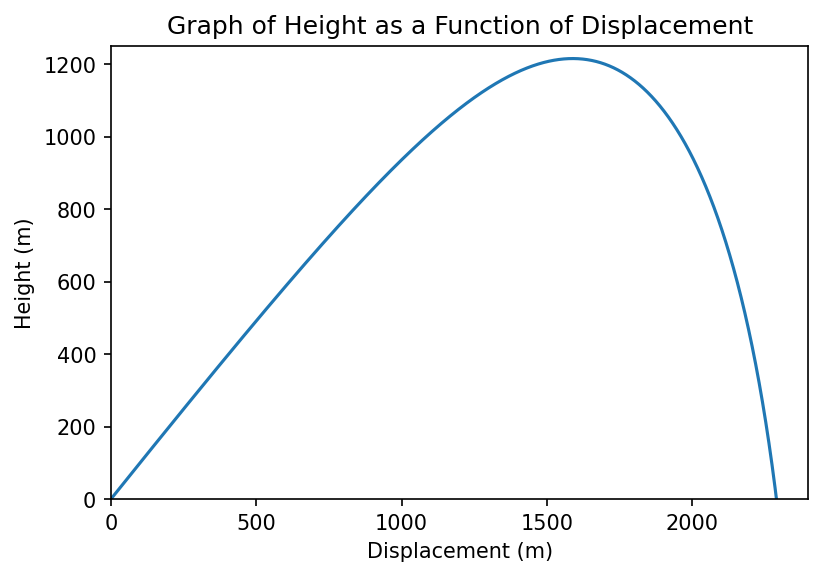

This graph demonstrates the trajectory and its path across the x-z plane


In [10]:
import matplotlib.pyplot as plt
print('\033[1m' + 'Question 1)' + '\033[0m')
x=wsol[:,0]
v_x=wsol[:1]
z=wsol[:,2]
v_z=wsol[:3]
y=wsol[:,4]
v_y=wsol[:5] #defines each solution to appropriate variable
plt.title("Graph of Height as a Function of Time")
plt.plot(t,z)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.axis([0,35,-1,1250])
plt.show()
print("This graph demonstrates how the height changes as a function time ")
plt.title("Graph of Displacement as a Function of Time")
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.show()
print("This graph demonstrates how the displacement increases as a function time.")
plt.plot(x,z) # graphing the x-z plane, a two dimensional projection of the trajectory of the cannonball
plt.title("Graph of Height as a Function of Displacement")
plt.xlabel('Displacement (m)')
plt.ylabel('Height (m)')
plt.axis([0,2400,0,1250])
plt.show()
print("This graph demonstrates the trajectory and its path across the x-z plane")



Question 2)
The higher the resolution (input interval), the more accurate the values for time of flight and displacement.

In [11]:
print('\033[1m' + 'Question 3)' + '\033[0m')
def find_nearest(array, value):
    idx=(np.abs(array-value)).argmin()#creates a function to find nearest value in an array to the target 100m at 0m height
    return array[idx], idx #returns height nearest to 0m  and index number for this value
z_1=z[1:] # converts the z array to be shifted by 1 index to not include the origin as that would be the nearest value
find_nearest(z_1,0)


Question 3)


(0.0850399493362275, 3046)

In [12]:
print("time of flight is", t[find_nearest(z_1,0)[1]] ,"seconds") #substitutes in the value of the index for the element
print("rounded to the nearest 0.1 seconds is ", round(t[3046],1), "to 3 significant figures.")

time of flight is 30.46 seconds
rounded to the nearest 0.1 seconds is  30.5 to 3 significant figures.


In [13]:
print("displacement in x direction", x[3046],"metres")
print("rounded to the nearest 10m is ", round(x[3046],0))

displacement in x direction 2289.9542126402557 metres
rounded to the nearest 10m is  2290.0


In [14]:
u=500
s_y=0
s_y=u*t-0.5*g*t**2
s_x=u*t

Question 4)


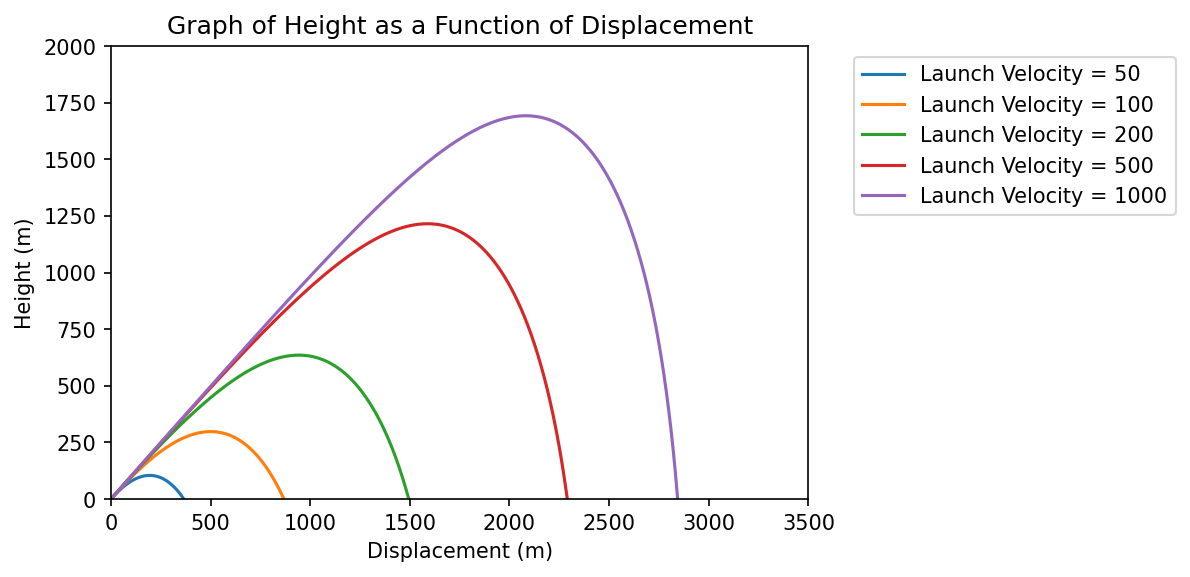

In [15]:
print('\033[1m' + 'Question 4)' + '\033[0m')
v_xa=[50,100,200,500,1000] #arrays of initial trajectories
v_za=[50,100,200,500,1000]
for i in range(0,5):
    g=10
    z_0=0
    x_0=0
    v_y=0
    y_0=0
    u_t=100
    v_x=v_xa[i]
    v_z=v_za[i]
    w_0=[x_0,v_x,z_0,v_z,y_0,v_y] #defines initial conditions and groups them in an array
    t = np.arange(0, 60, 0.01) # sets up input of time
    wsol = odeint(vectorfield, w_0, t) #integrates the vectorfield as a function of time 
    x=wsol[:,0]
    v_x=wsol[:1]
    z=wsol[:,2]
    v_z=wsol[:3]
    y=wsol[:,4]
    v_y=wsol[:5] #defines each solution to appropriate variable
    plt.plot(x,z,label= 'Launch Velocity = '+str(v_xa[i])) # graphing the x-z plane, a two dimensional projection of the trajectory of the cannonball
plt.legend(bbox_to_anchor=(1.05,1.0), loc='upper left')
plt.title("Graph of Height as a Function of Displacement")
plt.axis([0,3500,0,2000])
plt.xlabel('Displacement (m)')
plt.ylabel('Height (m)')
plt.show()

By increasing the initial Velocity by orders of maginitude, the object can travel further and higher along the x-z plane.

**Question 5)**$${
}$$
Aristotelian trajectories assume objects fall straight down under gravity after "impetus is lost" however the evidence shows that velocity still acts in the x direction until it hits the ground.
Galilean trajectories more accuarate than Aristotelian as they have a parabolic shape and demonstrate how the velocity in x direction still affects in motion. Yet both these models fail to account for air resistance as shown in graphs above; projectile motion is not parabolic but has more complex functions to describe it.

It would be parabolic when there is no air resistance as the t squared term is the dominant term in the function.

## Part 3  Predict the Landing Point of a Cannonball Without Wind

In [16]:
def vectorfield(w,t):
    x,v_x,z,v_z,y,v_y=w
    f=[v_x,(-g/(u_t)**2)*(v_x)*(((v_x)**2)+((v_z)**2)+((v_y)**2))**0.5,v_z,(-g/(u_t)**2)*(v_z)*(((v_x)**2)+((v_z)**2)+((v_y)**2))**0.5-g,0,0]
    return f

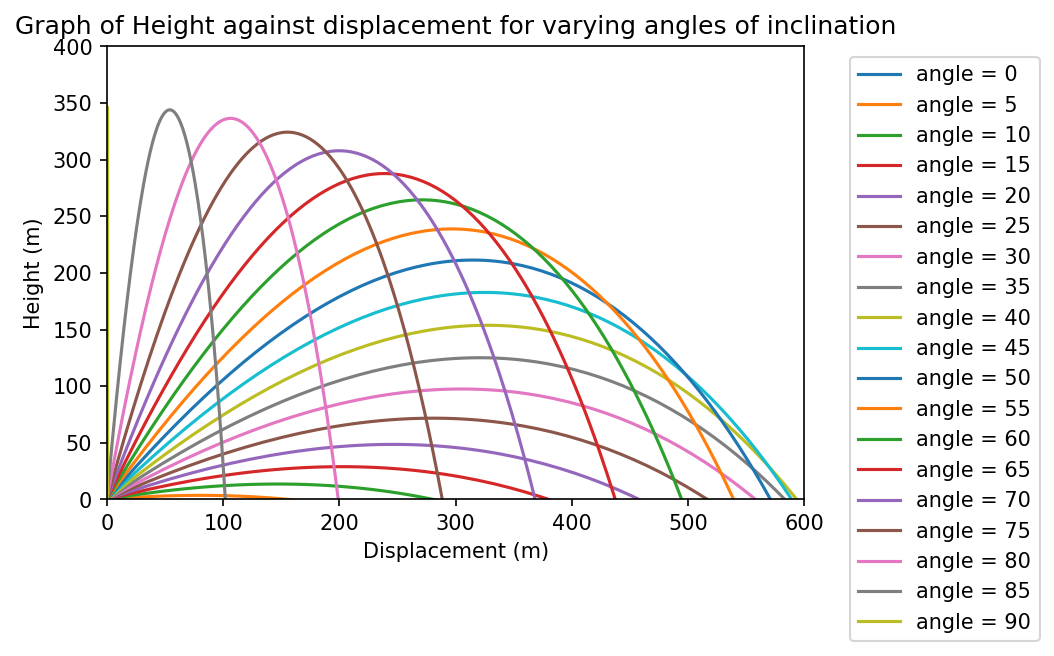

In [17]:

x_land=[]
for theta in range(0,95,5): #defines angle in degrees in steps of 5
    g=10
    z_0=0
    x_0=0
    v_x=100*math.cos(math.pi*theta/180) #now veloctiy has an angle and a component in both x and z 
    v_z=100*math.sin(math.pi*theta/180) #makes sure theta is in radians 
    v_y=0
    y_0=0
    u_t=100
    w_0=[x_0,v_x,z_0,v_z,y_0,v_y]
    t = np.arange(0, 70, 0.1)
    wsol = odeint(vectorfield, w_0, t)
    x=wsol[:,0]
    v_x=wsol[:1]
    z=wsol[:,2]
    v_z=wsol[:3]
    y=wsol[:,4]
    v_y=wsol[:5]
    plt.axis([0,600,0,400])
    plt.plot(x,z,label= 'angle = '+str(theta)) #defines the key to angles
    plt.xlabel('Displacement (m)')
    plt.ylabel('Height (m)')
    plt.title("Graph of Height against displacement for varying angles of inclination")
    plt.legend(bbox_to_anchor=(1.05,1.0), loc='upper left') #moves legend to outside of graph
    z_1=z[1:]
    x_land.append(x[find_nearest(z_1,0)[1]])#creates an array of landing points 
plt.show()

This Graph demonstrates how varying the angle of inclination affects the trajectory across the x-z plane x and z velocity components are affected, consequentially increasing and decreasing the displacement and height.

Question 1)


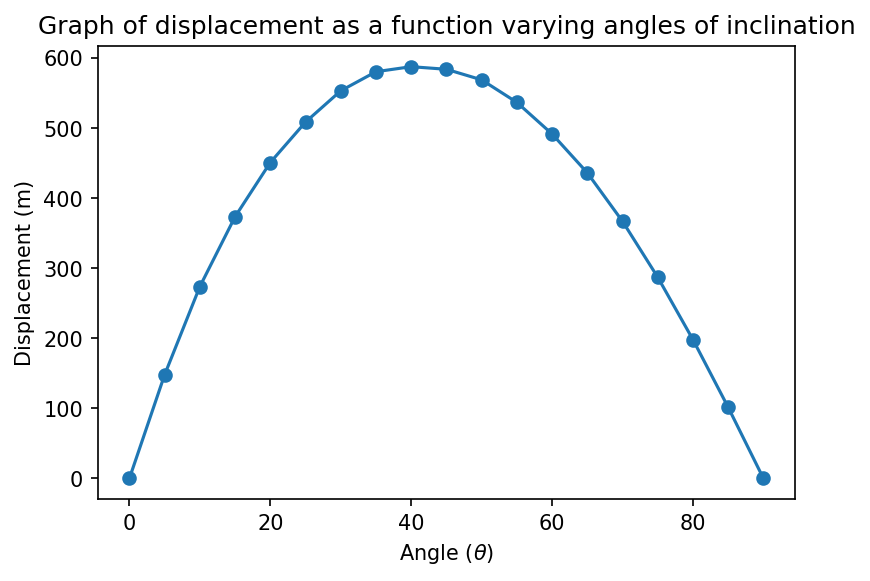

In [18]:
print('\033[1m' + 'Question 1)' + '\033[0m')
x_land
plt.xlabel(r'Angle ($\theta$)')
plt.ylabel('Displacement (m)')
plt.title("Graph of displacement as a function varying angles of inclination")
plt.plot(range(0,95,5),x_land, marker='o') #plots the range of angles against the array of landing points 


The above graph plots the displacement as a function of the angle fired. It reveals the optimal angle for greatest distance is 45 degrees. 

In [19]:
print('\033[1m' + 'Question 2)' + '\033[0m')
x_land=[]
theta_launch=np.arange(0,12,0.01) #in intervals of 0.01 for high resolution, a range of angles in degrees 
for theta in theta_launch:
    g=10
    z_0=0
    x_0=0
    v_x=100*math.cos(math.pi*theta/180) #velocity in x direction is cos component with a radian conversion
    v_z=100*math.sin(math.pi*theta/180)
    v_y=0
    y_0=0
    u_t=100
    w_0=[x_0,v_x,z_0,v_z,y_0,v_y]
    t = np.arange(0, 70, 0.01)
    wsol = odeint(vectorfield, w_0, t)
    x=wsol[:,0]
    v_x=wsol[:1]
    z=wsol[:,2]
    v_z=wsol[:3]
    y=wsol[:,4]
    v_y=wsol[:5]
    z_1=z[1:]
    x_land.append(x[find_nearest(z_1,00)[1]]) #creates an array of landing points (height of 0m)


Question 2)


In [20]:
print(find_nearest(np.array(x_land),100))
print("This is the closest landing point to the target with the interval number.")
#returns nearest value to 100m and index number 

(99.70566515181285, 308)
This is the closest landing point to the target with the interval number.


In [21]:
print('\033[1m' + 'Question 3)' + '\033[0m')
print(round(theta_launch[find_nearest(np.array(x_land),100)[1]],1) ,"degrees") 
# prints and rounds angle to 2 sig fig as required for this index number


Question 3)
3.1 degrees


## Part 4 Direct the Landing Point of a Cannonball With Wind

In [1]:
print('\033[1m' + 'Question 1)' + '\033[0m')
def vectorfield(r,t):
    x,v_x,z,v_z,y,v_y=r
    f=[v_x,(-g/(u_t)**2)*(v_x-w_x)*(((v_x-w_x)**2)+((v_z)**2)+((v_y-w_y)**2))**0.5,v_z,(-g/(u_t)**2)*(v_z)*(((v_x-w_x)**2)+((v_z)**2)+((v_y-w_y)**2))**0.5-g,v_y,(-g/(u_t)**2)*(v_y-w_y)*(((v_x-w_x)**2)+((v_z)**2)+((v_y-w_y)**2))**0.5]
    return f
#redefined vectorfield for 3 dimensions and includes wind
x_land=[]
phi_launch=np.arange(0,90,1)
theta_launch=np.arange(0,90,1)
for theta in theta_launch:    #loops made for theta and phi to solve to the nearest degree
    for phi in phi_launch:
        w_x=10
        w_y=0
        g=10
        z_0=0
        x_0=0
        v_x=100*math.cos(math.pi*theta/180)*math.sin(math.pi*phi/180)
        v_z=100*math.cos(math.pi*theta/180)*math.cos(math.pi*phi/180)
        v_y=100*math.sin(math.pi*theta/180)
        y_0=0
        u_t=100
        r_0=[x_0,v_x,z_0,v_z,y_0,v_y]
        t = np.linspace(0, 70, 100)
        rsol = odeint(vectorfield, r_0, t)
        x=rsol[:,0]
        v_x=rsol[:1]
        z=rsol[:,2]
        v_z=rsol[:3]
        y=rsol[:,4]
        v_y=rsol[:5]
        z_1=z[1:]
        x_land.append(x[find_nearest(z_1,0)[1]])#uses same function to add landing points using find nearest and selects the first value in array, the landing point
print(find_nearest(np.array(x_land),100))#returns the closest landing point to 100m target  and the interval number
print("This is the closest landing point to the target.")

Question 1)


NameError: name 'np' is not defined

**Question 2)**$${
}$$90 times the index number for theta + index for phi= 5416
as it repeats every 90 entries (degrees), the closest value to  is  (60*90) so 60 degrees theta and then add on phi idx to  which is 16\
858-810=48 so 48 degrees\
The azimuthal angle is 16 degrees and inclination is 60 degrees to the nearest degree.

In [23]:
print('\033[1m' + 'Question 3)' + '\033[0m')
#using found values for theta and phi from previous section of code
vm=100
wm=100
wmL=wm*0.9 #This is the lowest value for the 10% error
w0=[0, vm * math.cos(math.pi*theta)*math.cos(math.pi*phi), 0, vmL
* math.cos(math.pi*theta)*math.sin(math.pi*phi), 0, vmL * math.sin(math.pi*theta) ]
t = np.arange(0, 40, 1)
wsol = odeint(vectorfield, w0, t)
impactL=wsol[:,0][int(find_nearest(wsol[:,2][1:],0)[1]+1)] #This is the corresponding stored value
vm=100
wmU=wm*1.1 #This is the highest value for the 10% error
w0=[0, vm * math.cos(math.pi*theta)*math.cos(math.pi*phi), 0, vmU * math.cos(math.pi*theta)*math.sin(math.pi*phi), 0, vmU * math.sin(math.pi*theta) ]
t = np.arange(0, 40, 1)
wsol = odeint(vectorfield, w0, t)
impactU=wsol[:,0][int(find_nearest(wsol[:,2][1:],0)[1]+1)] #This is the corresponding stored value

print("10% error in muzzle velocity gives the impact has maximum and minimum values " + str(round(impactL,1)) + "m and " + str(round(impactU,1)) + "m")

Question 3)


NameError: name 'vmL' is not defined

In [ ]:
print('\033[1m' + 'Question 3)' + '\033[0m')
#using found values for theta and phi from previous section of code
vm=100
vmL=vm*0.9 #This is the lowest value for the 10% error
w0=[0, vmL * math.cos(math.pi*theta)*math.cos(math.pi*phi), 0, vmL * math.cos(math.pi*theta)*math.sin(math.pi*phi), 0, vmL * math.sin(math.pi*theta) ]
t = np.arange(0, 40, 1)
wsol = odeint(vectorfield, w0, t)
impactL=wsol[:,0][int(find_nearest(wsol[:,2][1:],0)[1]+1)] #This is the corresponding stored value

vmU=vm*1.1 #This is the highest value for the 10% error
w0=[0, vmU * math.cos(math.pi*theta)*math.cos(math.pi*phi), 0, vmU * math.cos(math.pi*theta)*math.sin(math.pi*phi), 0, vmU * math.sin(math.pi*theta) ]
t = np.arange(0, 40, 1)
wsol = odeint(vectorfield, w0, t)
impactU=wsol[:,0][int(find_nearest(wsol[:,2][1:],0)[1]+1)] #This is the corresponding stored value
print("10% error in muzzle velocity gives the impact has maximum and minimum values " + str(round(impactL,1)) + "m and " + str(round(impactU,1)) + "m"

In [ ]:
phi=16
theta=60
w_x=11
w_y=0
g=10
z_0=0
x_0=0
v_x=100*math.cos(math.pi*theta/180)*math.sin(math.pi*phi/180)
v_z=100*math.cos(math.pi*theta/180)*math.cos(math.pi*phi/180)
v_y=100*math.sin(math.pi*theta/180)
y_0=0
u_t=100
r_0=[x_0,v_x,z_0,v_z,y_0,v_y]
t = np.linspace(0, 70, 100)
rsol = odeint(vectorfield, r_0, t)
x=rsol[:,0]
v_x=rsol[:1]
z=rsol[:,2]
v_z=rsol[:3]
y=rsol[:,4]
v_y=rsol[:5]
z_1=z[1:]
x_land.append(x[find_nearest(z_1,0)[1]])#uses same function to add landing points using find nearest and selects the first value in array, the landing point
print(find_nearest(np.array(x_land),100))#returns the closest landing point to 100m target  and the interval number
print("This is the closest landing point to the target +10%")

phi=16
theta=60
w_x=9
w_y=0
g=10
z_0=0
x_0=0
v_x=100*math.cos(math.pi*theta/180)*math.sin(math.pi*phi/180)
v_z=100*math.cos(math.pi*theta/180)*math.cos(math.pi*phi/180)
v_y=100*math.sin(math.pi*theta/180)
y_0=0
u_t=100
r_0=[x_0,v_x,z_0,v_z,y_0,v_y]
t = np.linspace(0, 70, 200)
rsol = odeint(vectorfield, r_0, t)
x=rsol[:,0]
v_x=rsol[:1]
z=rsol[:,2]
v_z=rsol[:3]
y=rsol[:,4]
v_y=rsol[:5]
z_1=z[1:]
x_land.append(x[find_nearest(z_1,0)[1]])#uses same function to add landing points using find nearest and selects the first value in array, the landing point
print(find_nearest(np.array(x_land),100))#returns the closest landing point to 100m target  and the interval number
print("This is the closest landing point to the target -10%")

In [24]:

x_land=[]
phi_launch=np.arange(0,90,1)
theta_launch=np.arange(0,90,1)
for theta in theta_launch:    #loops made for theta and phi to solve to the nearest degree
    for phi in phi_launch:
        w_x=10*0.9
        w_y=0
        g=10
        z_0=0
        x_0=0
        v_x=100*math.cos(math.pi*theta/180)*math.sin(math.pi*phi/180)
        v_z=100*math.cos(math.pi*theta/180)*math.cos(math.pi*phi/180)
        v_y=100*math.sin(math.pi*theta/180)
        y_0=0
        u_t=100
        r_0=[x_0,v_x,z_0,v_z,y_0,v_y]
        t = np.linspace(0, 70, 100)
        rsol = odeint(vectorfield, r_0, t)
        x=rsol[:,0]
        v_x=rsol[:1]
        z=rsol[:,2]
        v_z=rsol[:3]
        y=rsol[:,4]
        v_y=rsol[:5]
        z_1=z[1:]
        x_land.append(x[find_nearest(z_1,0)[1]])#uses same function to add landing points using find nearest and selects the first value in array, the landing point
print(find_nearest(np.array(x_land),100))#returns the closest landing point to 100m target  and the interval number
print("This is the closest landing point to the target.")


x_land=[]
phi_launch=np.arange(0,90,1)
theta_launch=np.arange(0,90,1)
for theta in theta_launch:    #loops made for theta and phi to solve to the nearest degree
    for phi in phi_launch:
        w_x=10*1.1
        w_y=0
        g=10
        z_0=0
        x_0=0
        v_x=100*math.cos(math.pi*theta/180)*math.sin(math.pi*phi/180)
        v_z=100*math.cos(math.pi*theta/180)*math.cos(math.pi*phi/180)
        v_y=100*math.sin(math.pi*theta/180)
        y_0=0
        u_t=100
        r_0=[x_0,v_x,z_0,v_z,y_0,v_y]
        t = np.linspace(0, 70, 100)
        rsol = odeint(vectorfield, r_0, t)
        x=rsol[:,0]
        v_x=rsol[:1]
        z=rsol[:,2]
        v_z=rsol[:3]
        y=rsol[:,4]
        v_y=rsol[:5]
        z_1=z[1:]
        x_land.append(x[find_nearest(z_1,0)[1]])#uses same function to add landing points using find nearest and selects the first value in array, the landing point
print(find_nearest(np.array(x_land),100))#returns the closest landing point to 100m target  and the interval number
print("This is the closest landing point to the target.")

(99.99101281459554, 2434)
This is the closest landing point to the target.
(99.99680515345813, 2974)
This is the closest landing point to the target.


In [ ]:
2434/90

In [ ]:
2434-(27*90)

In [ ]:
2974/90

In [ ]:
2974-(90*33)

In [ ]:
x_land=[]
phi_launch=np.arange(0,90,1)
theta_launch=np.arange(0,90,1)
for theta in theta_launch:    #loops made for theta and phi to solve to the nearest degree
    for phi in phi_launch:
        w_x=10
        w_y=0
        g=10
        z_0=0
        x_0=0
        v_x=100*math.cos(math.pi*theta/180)*math.sin(math.pi*phi/180)
        v_z=100*math.cos(math.pi*theta/180)*math.cos(math.pi*phi/180)
        v_y=100*math.sin(math.pi*theta/180)
        y_0=0
        u_t=100
        r_0=[x_0,v_x,z_0,v_z,y_0,v_y]
        t = np.linspace(0, 70, 100)
        rsol = odeint(vectorfield, r_0, t)
        x=rsol[:,0]
        v_x=rsol[:1]
        z=rsol[:,2]
        v_z=rsol[:3]
        y=rsol[:,4]
        v_y=rsol[:5]
        z_1=z[1:]
        x_land.append(x[find_nearest(z_1,0)[1]])#uses same function to add landing points using find nearest and selects the first value in array, the landing point
print(find_nearest(np.array(x_land),100))#returns the closest landing point to 100m target  and the interval number
print("This is the closest landing point to the target.")

# Part 5 Different Solar satellites Trajectory Accounting for maximum wind speed and gravity


In [ ]:
def vectorfield(w,t):
    x,v_x,z,v_z,y,v_y=w
    f=[v_x,\
       (-g/(u_t)**2)*(v_x-w_x)*(((v_x-w_x)**2)+((v_z)**2)+((v_y-w_y)**2))**0.5,\
       v_z,\
       (-g/(u_t)**2)*(v_z)*(((v_x-w_x)**2)+((v_z)**2)+((v_y-w_y)**2))**0.5-g,\
       v_y,\
       (-g/(u_t)**2)*(v_y-w_y)*(((v_x-w_x)**2)+((v_z)**2)+((v_y-w_y)**2))**0.5]
    return f

In [ ]:
import numpy as np
from scipy.integrate import odeint

#vales obtained from following sources:
#https://www.smartconversion.com/otherInfo/gravity_of_planets_and_the_sun.aspx
#https://socratic.org/questions/how-fast-do-the-winds-on-the-other-planets-blow
#here arrays for values for gravitational constants (gs) and wind in x direction (w_xi) are created with respective planets 
gs=[[24.92, 11.15, 10.44, 9.798, 8.87, 8.87, 3.71, 3.7, 1.62, 0.58],["Jupiter", "Neptune", "Saturn", "Earth", "Uranus","Venus", "Mars" ,"mercury","moon", "Pluto"]]
w_xi=[[171.6,670.6,499.8,113.5,250.3,111,25.7,0,0,450000],["Jupiter", "Neptune", "Saturn", "Earth", "Uranus","Venus", "Mars" ,"mercury","moon", "Pluto"]]
v_z=100
w_y=0
z_0=0
x_0=0
v_x=100
v_y=0
y_0=0
u_t=100
w_0=[x_0,v_x,z_0,v_z,y_0,v_y]
t = np.linspace(0, 100, 200)
import matplotlib.pyplot as plt
for i in range(0,10):
    g=gs[0][i] #selects value of array corresponding to an element for gravitational constants
    w_x=w_xi[0][i] #selects value of array corresponding to an element for wind speeds
    wsol = odeint(vectorfield, w_0, t)    
    x=wsol[:,0]
    v_x=wsol[:1]
    z=wsol[:,2]
    v_z=wsol[:3]
    y=wsol[:,4]
    v_y=wsol[:5]


    plt.axis([0,5000,0,2000])
    plt.plot(x,z, label =gs[1][i]) #plots trajectory and adds labels for each planet 
    
    plt.legend(bbox_to_anchor=(1.05,1.0), loc='upper left')
    plt.xlabel('Displacement (m)')
    plt.ylabel('Height (m)')
    plt.title("Graph of Trajectories on different Planets")
plt.show()

The hostile wind conditions on the gas planets create very large displacements, counteracting their large gravitational constants. The exception of the moon, which has no wind and very weak gravitational field. However, planets from the inner solar system have similar wind and gravitational constants.

# Discussion

The graphs plotted from the starting conditions demonstarte how projectile motion works accounting for wind, gravity and drag. Of course, wind was simplified by the given conditions to acting in only in a single dimension and unchanging across time which in reality are constantly in flux. Furthermore, gravitational field was assumed to act as parallel lines, not radially as a function of height. Fixing gravity to a constant near the surface of the axis is not an unreasonable assumption as the value of the gravitational constant varies radially by only a few percent close to the surface of the Earth.

Improvements could be made by making the gravitaional constant closer to the true value of 9.81m/s^2 rather than 10m/s^2 and modelling wind as function of time. Further improvements to numerical answers could be made by decreasing interval sizes for angles and time to obtain a higher accuracy. These are the largest sources of error in the method. This does come at a cost of increasing complexity and time to run the code, so depends on what accuracy is required by the results.

Using numerical methods to solve the coupled differential equations only gives estimations of the answer as it just feeds values that get rounded and trunkated. Analytical solutions give functions in their exact form and give more accurate results on from the theory.

The equations used to describe the motion of the projectile account for variables and aspects of the world that Aristotle And Galileo could not. Yet they remain good approximations for the expected motion, Galileo's does apply in a ideal conditions of no drag. The functions and differential equations were written into code so modelled the trajectories with respect to the theory.

Using these differential equations, the same conditions could be modelled on different planets across the solar system with varying gravitational field strangths and wind speeds. The trajectories with constant initial conditions were graphed to compare these effects.

# Conclusion

This investigation used python to mathematically model projectile motion in 3 spatial dimensions. Reliability was discussed and it could be shown to accurately model real world problems.
The coupled differential equations were solved so fulfilled the objectives.
Dropping a ball 100m with a terminal velocity of 100m/s gave 4.55 seconds with air resistance and 4.48 acted upon only by gravity.
In 2 dimensions with 100/s launch velocity, the cannonball travlled 2290m for 30.5 seconds, rounded to 3 s.f. so an error of plus or minus 5 m and plus or minus 0.05 seconds respectively. To hit a target 100m, the cannon had to be fired at 3 degrees with respect to the x axis.
In 3 dimensions, an inclination angle of 9 degrees and azimuthal of 48 degrees plus or minus half a degree for each. A 10% error in muzzle velocity gave has maximum and minimum values 87.0m and 105.3m.
Overall, this investigation supports the use of Numerical methods to solve differential equations analytically.